<a href="https://colab.research.google.com/github/yasahiro10/ML_projects/blob/main/Clus_K_Means_Customer_Seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [19]:
np.random.seed(0)

**Input**

*  n_samples: The total number of points equally
divided among clusters.
Value will be: 5000
* centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
* cluster_std: The standard deviation of the clusters.
Value will be: 0.9

**Output**
* X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
* y: Array of shape [n_samples]. (Response Vector)
 The integer labels for cluster membership of each sample.

In [20]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

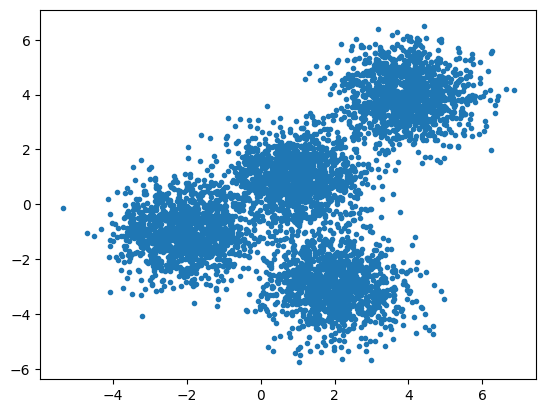

In [28]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [31]:
print(X.shape, y.shape)

(5000, 2) (5000,)


In [32]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [34]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [35]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [36]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

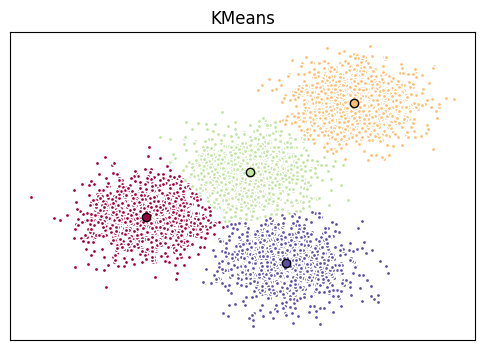

In [37]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Customer Segmentation with K-MEANS

In [38]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

In [40]:
import requests

# Create a requests session.
session = requests.Session()

# Make a GET request to the dataset link.
response = session.get(path)

# Get the contents of the response.
content = response.content

# Write the contents of the response to a file.
with open('Cust_Segmentation.csv', 'wb') as f:
  f.write(content)

In [41]:
import pandas as pd
cust_df=pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [42]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [43]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:] #extraxts all the rows and all columns from tje second column onward.
X = np.nan_to_num(X) #replace the nanvalues with zero
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [44]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

In [45]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [46]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


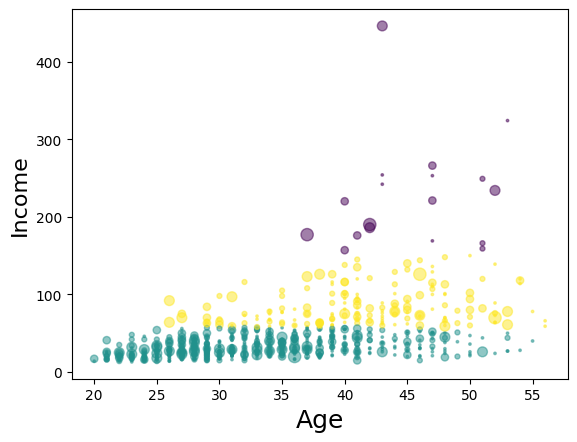

In [47]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
